# TP n°3: Identification des paramètres du modèle de fermentation

## Objectif

On identifiera les paramètres du modèle en deux étapes:

1. [Identification des paramètres de rendement](#identif1) $k_1$ et $k_2$ en tirant profit des relations linéaires entre $N$ et $X$ et entre $E$ et $S$.

2. [Identification des autres paramètres](#identif2) en utilisant un algorithme de minimisation non linéaire

In [34]:
import numpy as np # module numpy: vecteur, matrices, instructions vectorisees
import matplotlib.pyplot as plt # module matplotlib: librairie graphique
import scipy.integrate as scint
import scipy.optimize as scop
import os

plt.close('all') # close all figure

## <a name='identif1'>1. Identification des paramètres de rendement $k_1$ et $k_2$</a>

Le modèle de fermentation en réacteur batch suppose des relations linéaires entre $N$ et $X$ et entre $E$ et $S$.

On a en effet:
$$\frac{dS}{dt}+k_2\frac{dE}{dt}=0 \Longleftrightarrow S(t)+k_2E(t)=S(0)+k_2E(0)= \text{constante}$$
$$\frac{dN}{dt}+k_1\frac{dX}{dt}=0 \Longleftrightarrow N(t)+k_1X(t)=N(0)+k_1X(0)=\text{constante}$$

Cela veut dire que le modèle suppose que tout le sucre qui se dégrade se transforme en ethanol et que tout l'azote qui est consommée se transforme en biomasse.

Les relations étant linéaires, on peut utiliser un estimateur de moindres carrés linéaires.

$\bullet$ **Tracé de $N$ en fonction de $B$ et de $S$ en fonction de $E$** pour vérifier si on retrouve la relation linéaire dans les données

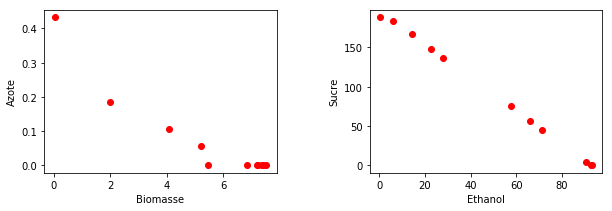

In [35]:
# Tracé des données expérimentales
# --------------------------------
    
# Chargement des données expérimentales qui sont stockées dans le fichier batch.txt
Data = np.loadtxt('batch.txt')
Datatime = Data[:,0] #temps
DataB2 = Data[:,1] # biomasse en 10^6 cell/mL
DataB = Data[:,6] # biomasse en g/L
DataN = Data[:,2]/1000 # azote
DataE = Data[:,3] # ethanol
DataS = Data[:,4] # sucre
DataCO2 = Data[:,5]/100 # taux de production de CO2

t0 = Datatime[0]  # instant initial de la simulation
tf = Datatime[-1] # instant final de la simulation

plt.figure(figsize = (10, 3))
plt.subplots_adjust(hspace=0.4,wspace=0.4)
plt.subplot2grid((1,2),(0,0))
plt.plot(DataB,DataN,'ro')
plt.xlabel('Biomasse')
plt.ylabel('Azote')

plt.subplot2grid((1,2),(0,1))
plt.plot(DataE,DataS,'ro')
plt.xlabel('Ethanol')
plt.ylabel('Sucre')

plt.show()

On constate effectivement une relation linéaire marquée entre $S$ et $E$. Entre $N$ et $B$ la linéarité est moins évidente.

$\bullet$ **Identification de $k_1$ et $k_2$** en résolvant les problèmes de minimisation suivants:
$$ (\hat{k_1},\hat{c_1})=\min_{(k_1,b)} \left\| k_1X(t)+c_1+N(t)\right\|^2 $$
$$ (\hat{k_2},\hat{c_2})=\min_{(k_2,c)} \left\| k_2E(t)+c_2+S(t)\right\|^2 $$

$\hat{k_1}$ et $\hat{k_2}$ sont des estimations de $k_1$ et de $k_2$.
$\hat{c_1}$ et $\hat{c_2}$ sont des estimations de $-N(0)-k_1X(0)$ et $-S(0)-k_2E(0)$.

On utilisera pour résoudre ces problèmes des fonctions déjà codés sous python comme la fonction np.linalg.lstsq qui calcule l'estimateur de moindre carrés pour un système linéaire $Ax=b$. Cette fonction permet donc de résoudre le problème
$$ \min_{x} \left\|Ax-b\right\|^2$$

In [36]:
# Identification des paramètres k1 et k2 du modèle de fermentation en réacteur batch
# ----------------------------------------------------------------------------------

# identification de k1
# --------------------
# A COMPLETER

# identification de k2
# --------------------
# A COMPLETER

## <a name='identif2'>2. Identification des autres paramètres du modèle avec les moindres carrés</a>

Pour cela, on va résoudre le problème non linéaire suivant:

$$ \hat{\theta}=\min_{\theta} \left\|y^{sim}(\theta)-y^{data} \right\|^2$$

où $\theta$ est le vecteur des paramètres du modèle

$y^{sim}$ est la sortie simulée via le modèle

et $y^{data}$ est la sortie mesurée (données expérimentales)

Dans le cas de la fermentation, on a $4$ variables d'état donc le problème va s'écrire:

$$ \hat{\theta}=\min_{\theta} \left( \beta_E\left\|E^{sim}(\theta)-E^{data} \right\|^2 + \beta_S\left\|S^{sim}(\theta)-S^{data} \right\|^2 + \beta_N\left\|N^{sim}(\theta)-N^{data} \right\|^2 + \beta_X\left\|X^{sim}(\theta)-X^{data} \right\|^2\right)$$

où $\theta$ est le vecteur des paramètres du modèle de fermentation en réacteur batch

$(X^{sim},N^{sim},E^{sim},S^{sim})$ sont les sorties simulées via le modèle de fermentation en réacteur batch

$(X^{data},N^{data},E^{data},S^{data})$ sont les sorties mesurées (données expérimentales)

et $(\beta_X, \beta_N, \beta_E, \beta_S)$ sont des poids de pondération

A noter que, comme $E^{sim}$ est une trajectoire, c'est à dire une fonction du temps, la norme $\left\|E^{sim}-E^{data} \right\|^2$ est définie de la manière suivante:

$$\left\|E^{sim}(\theta)-E^{data} \right\|^2=\int_{0}^T (E^{sim}(\theta,s)-E^{data}(s))^2 ds$$

Numériquement, il va falloir calculer une approximation de cette intégrale car les mesures expérimentales sont discrètes. On ne mesure en effet pas les variables à chaque temps $t$ mais à des instants discrets $t_i$, $i=1:N$ où $N$ est le nombre de mesures effectuées.

On pourra par exemple utiliser l'approximation de type trapèze:

$$\left\|g \right\|^2=\int_{0}^T g(s)^2 ds \simeq \sum_{i=1}^{N-1} \frac{g(t_i)^2+g(t_{i+1})^2}{2}(t_{i+1}-t_i)$$

Les poids de pondération $\beta_E$ pourra quant à lui être calculé de la manière suivante:

$$ \beta_E = \frac{1}{\left\| E^{data} \right\|} = \frac{1}{\int_{0}^T (E^{data}(s))^2 ds}$$

que l'on pourra approcher numériquement par:

$$ \beta_E  \simeq \frac{1}{\sum_{i=1}^{N-1} \frac{E^{data}(t_i)^2+E^{data}(t_{i+1})^2}{2}(t_{i+1}-t_i)}$$


 final_simplex: (array([[  6.06000000e-02,   2.17000000e+00,   1.34000000e+00,
          1.45000000e+00,   1.57000000e+00,   1.41000000e+01,
          1.54000000e-02,   3.03083594e-02,   4.32470000e-01,
          4.15404752e-01,   1.88072161e+02],
       [  6.06000231e-02,   2.17000000e+00,   1.34000000e+00,
          1.45000000e+00,   1.57000000e+00,   1.41000000e+01,
          1.54000000e-02,   3.03083594e-02,   4.32470000e-01,
          4.15404752e-01,   1.88072161e+02],
       [  6.06000000e-02,   2.17000083e+00,   1.34000000e+00,
          1.45000000e+00,   1.57000000e+00,   1.41000000e+01,
          1.54000000e-02,   3.03083594e-02,   4.32470000e-01,
          4.15404752e-01,   1.88072161e+02],
       [  6.06000000e-02,   2.17000000e+00,   1.34000051e+00,
          1.45000000e+00,   1.57000000e+00,   1.41000000e+01,
          1.54000000e-02,   3.03083594e-02,   4.32470000e-01,
          4.15404752e-01,   1.88072161e+02],
       [  6.06000000e-02,   2.17000000e+00,   1.34000000e+0

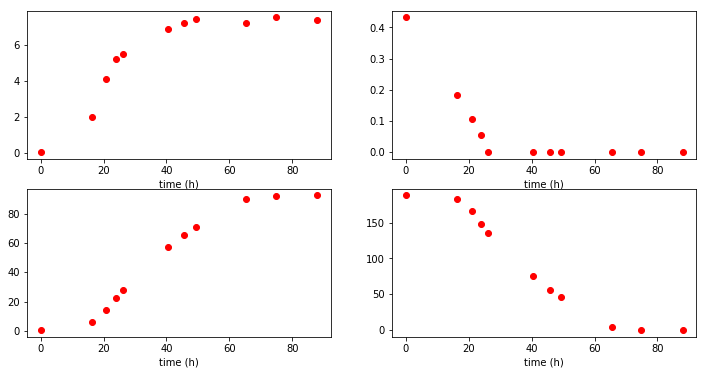

k1 = 0.0606
k2 = 2.17
mu1max = 1.34
mu2max = 1.45
KN = 1.57
KE = 14.1
KS = 0.0154
B0 = 0.0303083594
N0 = 0.43247
E0 = 0.4154047525
S0 = 188.072160664


In [37]:
# Fonction à minimiser
def err(p,beta):
    # p: paramètres du modèle à identifier
    k1 = abs(p[0])
    # etc ...
    
    # A COMPLETER
    
    f2min = 0

    return f2min

    
# Identification du modèle de fermentation
# ----------------------------------------
# Identification 1: on identifie tous les paramètres et la condition initiale
# ---------------------------------------------------------------------------

# tracé des données
f, ax = plt.subplots(2,2,figsize = (12, 6))

ax[0,0].plot(Datatime,DataB,'ro')
ax[0,0].set_xlabel('time (h)')
    
ax[0,1].plot(Datatime,DataN,'ro')
ax[0,1].set_xlabel('time (h)')
    
ax[1,0].plot(Datatime,DataE,'ro')
ax[1,0].set_xlabel('time (h)')
    
ax[1,1].plot(Datatime,DataS,'ro')
ax[1,1].set_xlabel('time (h)')

# Calcul des poids de pondération
beta=np.zeros(4)
# A COMPLETER
beta[0]= 0
beta[1]= 0
beta[2]= 0
beta[3]= 0

# valeurs initiales des paramètres du modèle
k1 = 0.0606 # -
k2 = 2.17 # -
mu1max = 1.34 # 1/h
mu2max = 1.45 # 1/h
KN = 1.57 # g/L
KE = 14.1 # g/L
KS = 0.0154 # g/L
p0 = np.array([k1,k2,mu1max,mu2max,KN,KE,KS,DataB[0],DataN[0],DataE[0],DataS[0]])

ps1 = scop.minimize(err,p0,args=(beta,),method='Nelder-Mead',options={"maxiter":40000})
print(ps1)
plt.show()

print('k1 =',abs(ps1.x[0]))
print('k2 =',abs(ps1.x[1]))
print('mu1max =',abs(ps1.x[2]))
print('mu2max =',abs(ps1.x[3]))
print('KN =',abs(ps1.x[4]))
print('KE =',abs(ps1.x[5]))
print('KS =',abs(ps1.x[6]))
print('B0 =',abs(ps1.x[7]))
print('N0 =',abs(ps1.x[8]))
print('E0 =',abs(ps1.x[9]))
print('S0 =',abs(ps1.x[10]))

In [38]:
# Identification 2: on identifie la condition initiale ettous les paramètres sauf k2 qui prend la valeur k2_est 
# -------------------------------------------------------------------------------------------------------------
# A COMPLETER

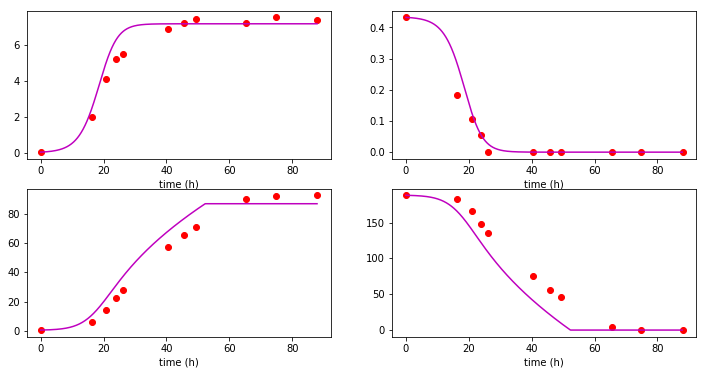

In [39]:
# Simulations avec les paramètres identifiés: comparaison entre les résultats des deux identifications
# ----------------------------------------------------------------------------------------------------
f2, ax2 = plt.subplots(2,2,figsize = (12, 6))
ax2[0,0].plot(Datatime,DataB,'ro')
ax2[0,0].set_xlabel('time (h)')
ax2[0,1].plot(Datatime,DataN,'ro')
ax2[0,1].set_xlabel('time (h)')
ax2[1,0].plot(Datatime,DataE,'ro')
ax2[1,0].set_xlabel('time (h)')
ax2[1,1].plot(Datatime,DataS,'ro')
ax2[1,1].set_xlabel('time (h)')

# Simulation avec le premier jeu de paramètres identifiés
# -------------------------------------------------------
k1 = ps1.x[0]
k2 = ps1.x[1]
mu1max = ps1.x[2]
mu2max = ps1.x[3]
KN = ps1.x[4]
KE = ps1.x[5]
KS = ps1.x[6]

# condition initiale
x0 = ps1.x[7:]

# vecteur temps
t = np.arange(t0,tf,0.1)

# intégration numérique de l'EDO
y = scint.odeint(fermenter,x0,t,args=(k1,k2,mu1max,mu2max,KN,KE,KS))

# tracé des solutions
color_plot='m'
ax2[0,0].plot(t,y[:,0],color=color_plot,label='identif 1')
ax2[0,1].plot(t,y[:,1],color=color_plot)
ax2[1,0].plot(t,y[:,2],color=color_plot) 
ax2[1,1].plot(t,y[:,3],color=color_plot)

# Simulation avec le deuxième jeu de paramètres identifiés
# -------------------------------------------------------
#  A COMPLETER

plt.show()
    